In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir("gdrive/Shared drives/CMPE 255")

Importing Libraries

In [0]:

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.spatial.distance import cdist

Making the Connection with the DataSet

In [0]:
import sqlite3
import pandas as pd
connection = sqlite3.connect('./dataSet/yelpHotelData.db')
x1 = connection.execute("select * FROM review")

In [0]:
description = []
Class = []

data = x1.fetchmany(688329)

for x in data:
  description.append(x[3])
  Class.append(x[8])
trainData = {'Class' : Class, 'Description' : description}
df_X = pd.DataFrame(trainData)

Converting multiclass classification into Binary Classification

In [0]:
#Convert NR->N , YR->Y
df_X.loc[df_X['Class'] == "NR", 'Class'] = "N"
df_X.loc[df_X['Class'] == "YR", 'Class'] = "Y"
df_X['Class'].value_counts()

N    420785
Y    267544
Name: Class, dtype: int64

In [0]:
df_X['Class'] = df_X['Class'].apply(lambda x:1 if x=='Y' else 0)

In [0]:
texts = df_X['Description'].values
labels = df_X['Class'].values

In [0]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
MAX_NUM_WORDS=1000
MAX_SEQUENCE_LENGTH=100
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 322447 unique tokens.
Shape of data tensor: (688329, 100)
Shape of label tensor: (688329,)


In [0]:
labels=np.asarray(labels)

In [0]:
VALIDATION_SPLIT=0.2

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
# nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

# x_train = data[:-nb_validation_samples]
# y_train = labels[:-nb_validation_samples]
# x_val = data[-nb_validation_samples:]
# y_val = labels[-nb_validation_samples:]

In [0]:
# #Preparing the Embedding layer

# GLOVE_DIR='../input/glove-global-vectors-for-word-representation/'

# import os
# embeddings_index = {}
# f = open(os.path.join(GLOVE_DIR, 'glove.6B.50d.txt'))
# for line in f:
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()

# print('Found %s word vectors.' % len(embeddings_index))

In [0]:
training_samples =  550663 #  train on 75000 samples
test_samples = 137706
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_test = data[training_samples: training_samples + test_samples]
y_test = labels[training_samples: training_samples + test_samples]
print(" x_train",x_train.shape)
print(" y_train",y_train.shape)

 x_train (550663, 100)
 y_train (550663,)


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Embedding, Conv1D,MaxPooling1D, Flatten, Dense,Dropout,LSTM,Bidirectional
from keras.optimizers import RMSprop

In [0]:
max_words = 10000 
maxlen = 100
model = Sequential()
model.add(Embedding(max_words, 64,input_length = maxlen))
model.add(LSTM(64,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


In [0]:
%%time
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 440530 samples, validate on 110133 samples
Epoch 1/5
440530/440530 [==============================] - 738s 2ms/step - loss: 0.6249 - acc: 0.6428 - val_loss: 0.6256 - val_acc: 0.6366
Epoch 2/5
440530/440530 [==============================] - 720s 2ms/step - loss: 0.6123 - acc: 0.6559 - val_loss: 0.6078 - val_acc: 0.6595
Epoch 3/5
440530/440530 [==============================] - 717s 2ms/step - loss: 0.6063 - acc: 0.6618 - val_loss: 0.6079 - val_acc: 0.6575
Epoch 4/5
440530/440530 [==============================] - 716s 2ms/step - loss: 0.6029 - acc: 0.6651 - val_loss: 0.6047 - val_acc: 0.6630
Epoch 5/5
440530/440530 [==============================] - 696s 2ms/step - loss: 0.6005 - acc: 0.6676 - val_loss: 0.6025 - val_acc: 0.6641
CPU times: user 1h 25min 23s, sys: 12min 19s, total: 1h 37min 43s
Wall time: 59min 47s


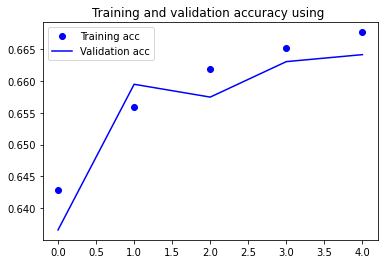

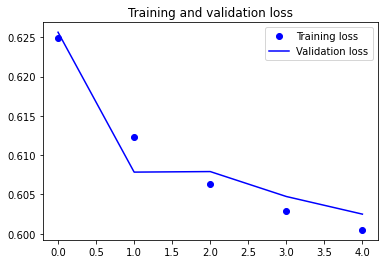

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy using ')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model.evaluate(x_test, y_test)


137666/137666 [==============================] - 76s 551us/step


[0.6024990576355076, 0.6639983654022217]

#Model 2 - Using combination of CNN and LSTM

In [0]:
#Model 2 - Using combination of 1D CNN and LSTM

In [0]:
model_conv = Sequential()
model_conv.add(Embedding(max_words, 128, input_length=maxlen))
model_conv.add(Dropout(0.2))
model_conv.add(Conv1D(64, 5, activation='relu'))
model_conv.add(MaxPooling1D(pool_size=3))
model_conv.add(LSTM(128))
model_conv.add(Dense(1, activation='sigmoid'))
model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 64)            41024     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 32, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,419,969
Trainable params: 1,419,969
Non-trainable params: 0
____________________________________________

In [0]:
history = model_conv.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 440530 samples, validate on 110133 samples
Epoch 1/5
440530/440530 [==============================] - 251s 569us/step - loss: 0.6126 - accuracy: 0.6543 - val_loss: 0.6097 - val_accuracy: 0.6572
Epoch 2/5
440530/440530 [==============================] - 242s 549us/step - loss: 0.6016 - accuracy: 0.6651 - val_loss: 0.6097 - val_accuracy: 0.6559
Epoch 3/5
440530/440530 [==============================] - 242s 549us/step - loss: 0.5960 - accuracy: 0.6706 - val_loss: 0.6004 - val_accuracy: 0.6674
Epoch 4/5
440530/440530 [==============================] - 242s 550us/step - loss: 0.5893 - accuracy: 0.6769 - val_loss: 0.5994 - val_accuracy: 0.6666
Epoch 5/5
440530/440530 [==============================] - 242s 550us/step - loss: 0.5827 - accuracy: 0.6836 - val_loss: 0.6028 - val_accuracy: 0.6635


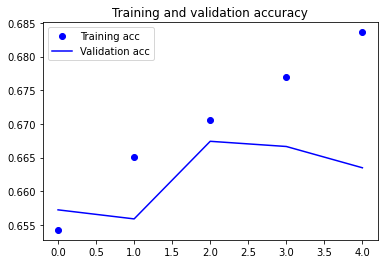

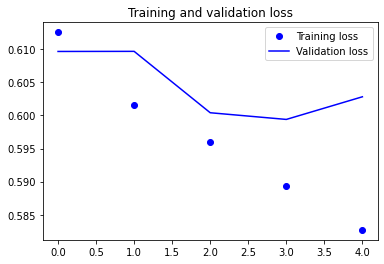

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Using bidirectional RNN's



In [0]:
#Using bidirectional RNN's
from keras import backend as K
K.clear_session()

In [0]:
max_words = 10000 
maxlen = 100
model = Sequential()
model.add(Embedding(max_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 1,543,425
Trainable params: 1,543,425
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 440530 samples, validate on 110133 samples
Epoch 1/5
440530/440530 [==============================] - 1244s 3ms/step - loss: 0.6175 - accuracy: 0.6497 - val_loss: 0.6107 - val_accuracy: 0.6543
Epoch 2/5
440530/440530 [==============================] - 1257s 3ms/step - loss: 0.6054 - accuracy: 0.6627 - val_loss: 0.6051 - val_accuracy: 0.6644
Epoch 3/5
440530/440530 [==============================] - 1242s 3ms/step - loss: 0.5996 - accuracy: 0.6687 - val_loss: 0.6023 - val_accuracy: 0.6644
Epoch 4/5
440530/440530 [==============================] - 1238s 3ms/step - loss: 0.5957 - accuracy: 0.6731 - val_loss: 0.6033 - val_accuracy: 0.6661
Epoch 5/5
440530/440530 [==============================] - 1172s 3ms/step - loss: 0.5922 - accuracy: 0.6758 - val_loss: 0.6014 - val_accuracy: 0.6653


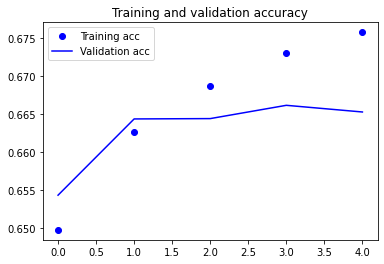

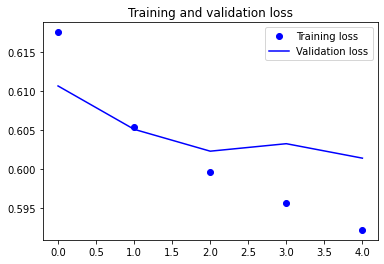

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# model.save("gdata/BiLSTM.h5")
model.evaluate(x_test, y_test)

137666/137666 [==============================] - 128s 930us/step


[0.6014797444732058, 0.6643470525741577]